In [56]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [57]:
df["Survived"].unique()

array([0, 1], dtype=int64)

In [58]:
# Note1: Classification model will be applied

In [59]:
df.shape

(891, 12)

# EDA
## 1. Null/NaN¶

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [62]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [63]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [64]:
df["Age"]=df["Age"].fillna((df["Age"].median())) # Fill the nan values with median of age

In [65]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0]) # Fill the nan values with mode as it is an object

In [66]:
columns_to_drop=["Cabin",] # It can be dropped as more than 50% is nan
df = df.drop(columns_to_drop, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [67]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Note2: 
- it has "Name","Sex","Ticket","Embarked" as object


In [69]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       

In [70]:
df.nunique().to_frame("No of unique values")

,No of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


## Note3:
- Passenger ID and Name can be dropped as well as it has unique values. 
- Survived, Pclass, Sex, Sibsp, Parch, Embarked are categorical data 

In [71]:
columns_to_drop=["PassengerId"]
df = df.drop(columns_to_drop, axis=1)


In [72]:
columns_to_drop=["Name"]
df = df.drop(columns_to_drop, axis=1)

In [73]:
df.shape

(891, 9)

In [74]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(875, 9)

# 2. Label Encoder

In [75]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1.0,22.0,1,0,523.0,7.2500,2.0
1,1,1,0.0,38.0,1,0,596.0,71.2833,0.0
2,1,3,0.0,26.0,0,0,669.0,7.9250,2.0
3,1,1,0.0,35.0,1,0,49.0,53.1000,2.0
4,0,3,1.0,35.0,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,101.0,13.0000,2.0
887,1,1,0.0,19.0,0,0,14.0,30.0000,2.0
888,0,3,0.0,28.0,1,2,675.0,23.4500,2.0
889,1,1,1.0,26.0,0,0,8.0,30.0000,0.0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  875 non-null    int64  
 1   Pclass    875 non-null    int64  
 2   Sex       875 non-null    float64
 3   Age       875 non-null    float64
 4   SibSp     875 non-null    int64  
 5   Parch     875 non-null    int64  
 6   Ticket    875 non-null    float64
 7   Fare      875 non-null    float64
 8   Embarked  875 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 68.4 KB


# 3. Skewness, Outliars (We donot remove Skewness and Outliars from cataegorial columns)

## Survived, Pclass, Sex, Sibsp, Parch, Embarked,Fare are categorical data

In [77]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,0.384000,2.300571,0.649143,29.417623,0.475429,0.372571,338.165714,32.007399,1.536000
std,0.486636,0.838129,0.477511,13.099904,0.947248,0.802272,200.682106,49.997091,0.791557
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,159.500000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,336.000000,14.400000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,518.500000,30.500000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,2.000000


- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - Nothing found   --> Left Skewed
- Median (50%) < Mean - "Fare" -> Right Skewed
- Standard Dev for "Fare","Ticket" is high -> Outliars are present
- Percentile 75% and max : It is there in "Age", "Fare" - outliars are present

In [78]:
df.skew()

Survived    0.477835
Pclass     -0.612333
Sex        -0.626098
Age         0.509292
SibSp       3.223952
Parch       2.824881
Ticket      0.004630
Fare        4.796175
Embarked   -1.263203
dtype: float64

In [79]:
# Fare is skewed

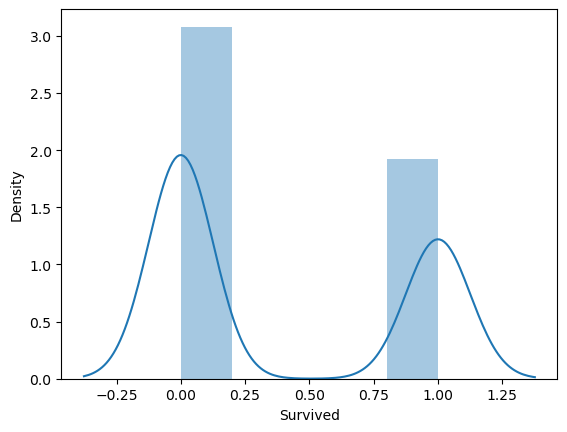

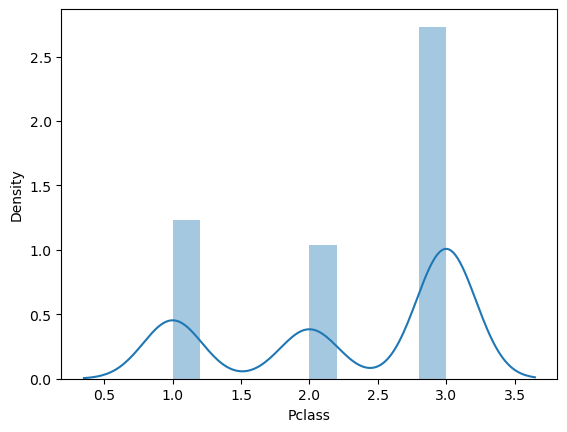

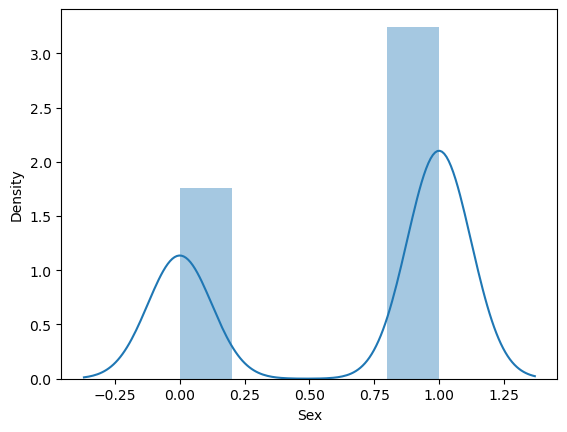

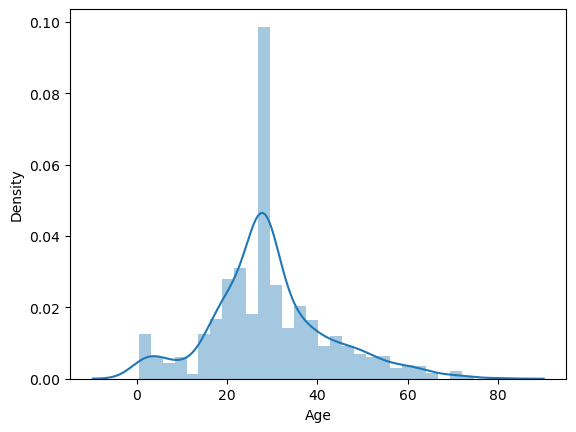

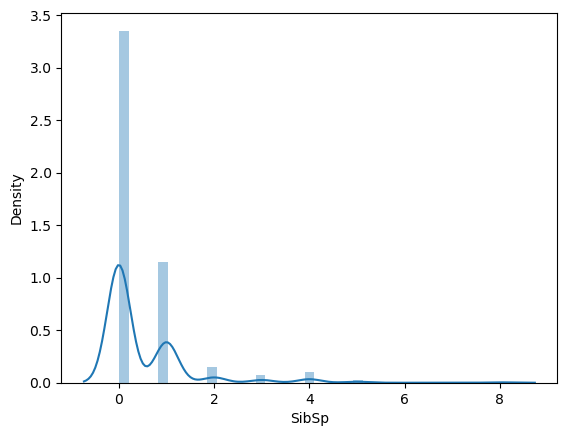

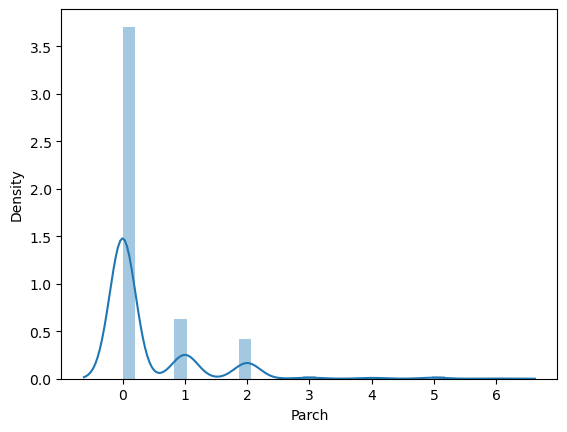

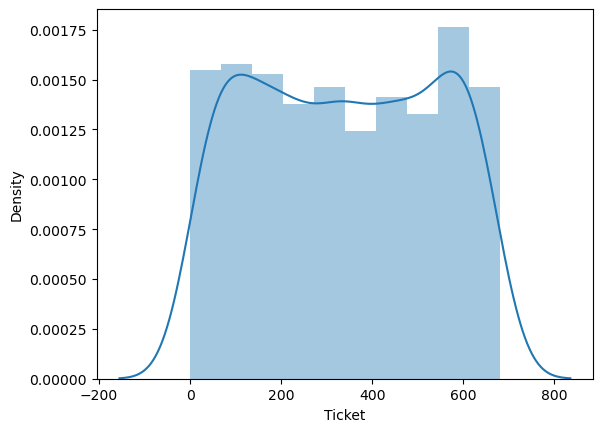

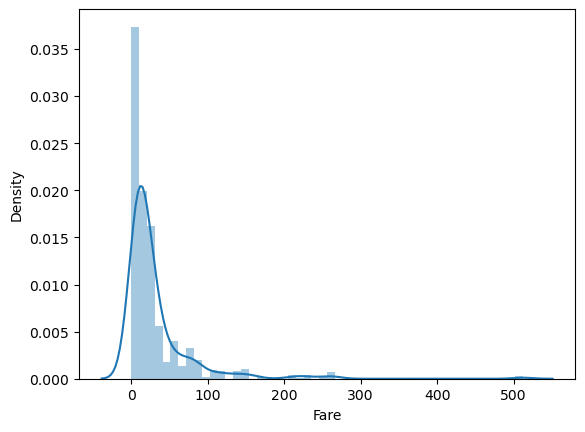

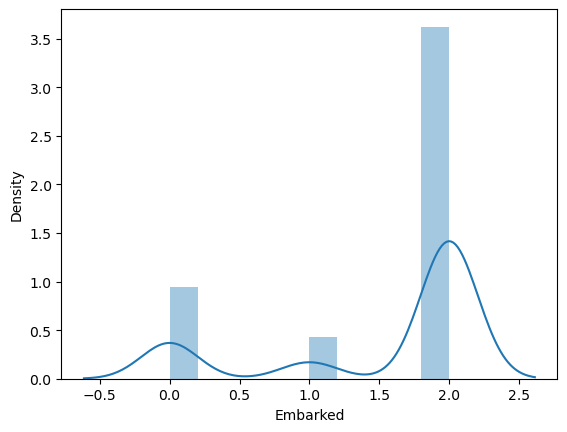

In [80]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

In [81]:
df.nunique().to_frame("No of unique values")

,No of unique values
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


Survived       Axes(0.125,0.653529;0.168478x0.226471)
Pclass      Axes(0.327174,0.653529;0.168478x0.226471)
Sex         Axes(0.529348,0.653529;0.168478x0.226471)
Age         Axes(0.731522,0.653529;0.168478x0.226471)
SibSp          Axes(0.125,0.381765;0.168478x0.226471)
Parch       Axes(0.327174,0.381765;0.168478x0.226471)
Ticket      Axes(0.529348,0.381765;0.168478x0.226471)
Fare        Axes(0.731522,0.381765;0.168478x0.226471)
Embarked           Axes(0.125,0.11;0.168478x0.226471)
dtype: object

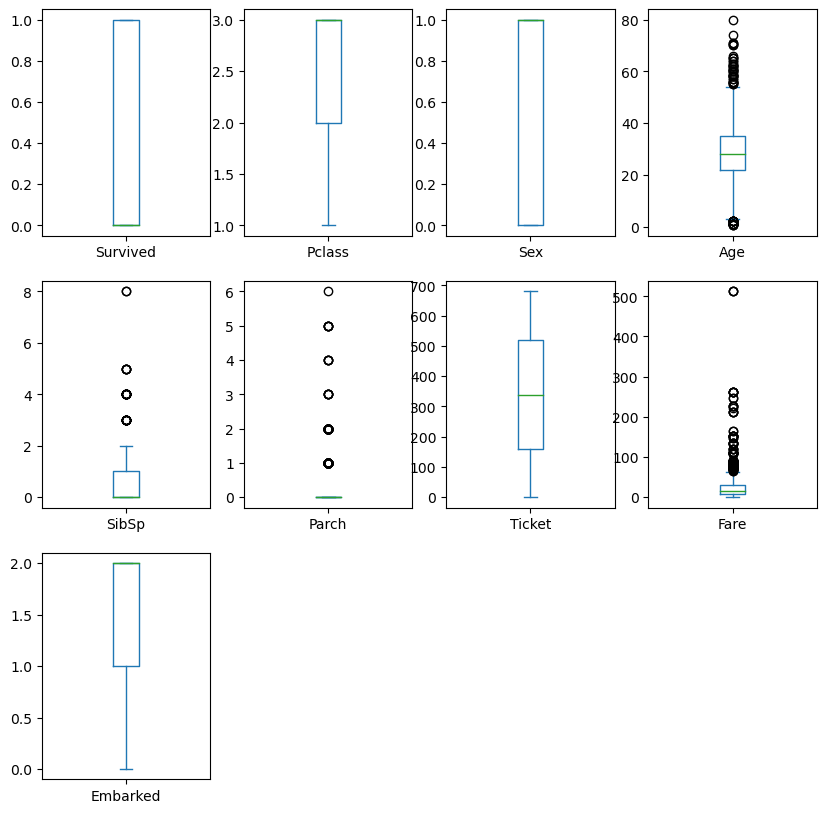

In [82]:
df.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

In [83]:
# Age has outliares, rest are the categorical data

In [84]:
from scipy.stats import zscore
ol = ["Age"]
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss rate 0.8


## Data Loss is less than 1%

# 4. Co- Relation and Multicolinearity

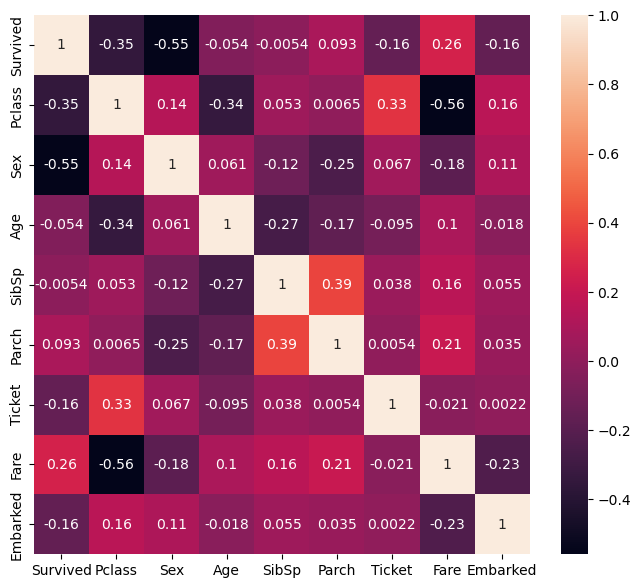

In [86]:
corr_hmap=df1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

- Near to Zero : No Corelation- Low Corelation Worst - "Age", Sibsp, Parch, Ticket, Embarked
- 0.3 or >-0.3 --> "Pclass"
- 0.5 or >-0.5 --> Mod Corelation - "Sex"
- 0.7 or >-0.7 --> High Corelation 

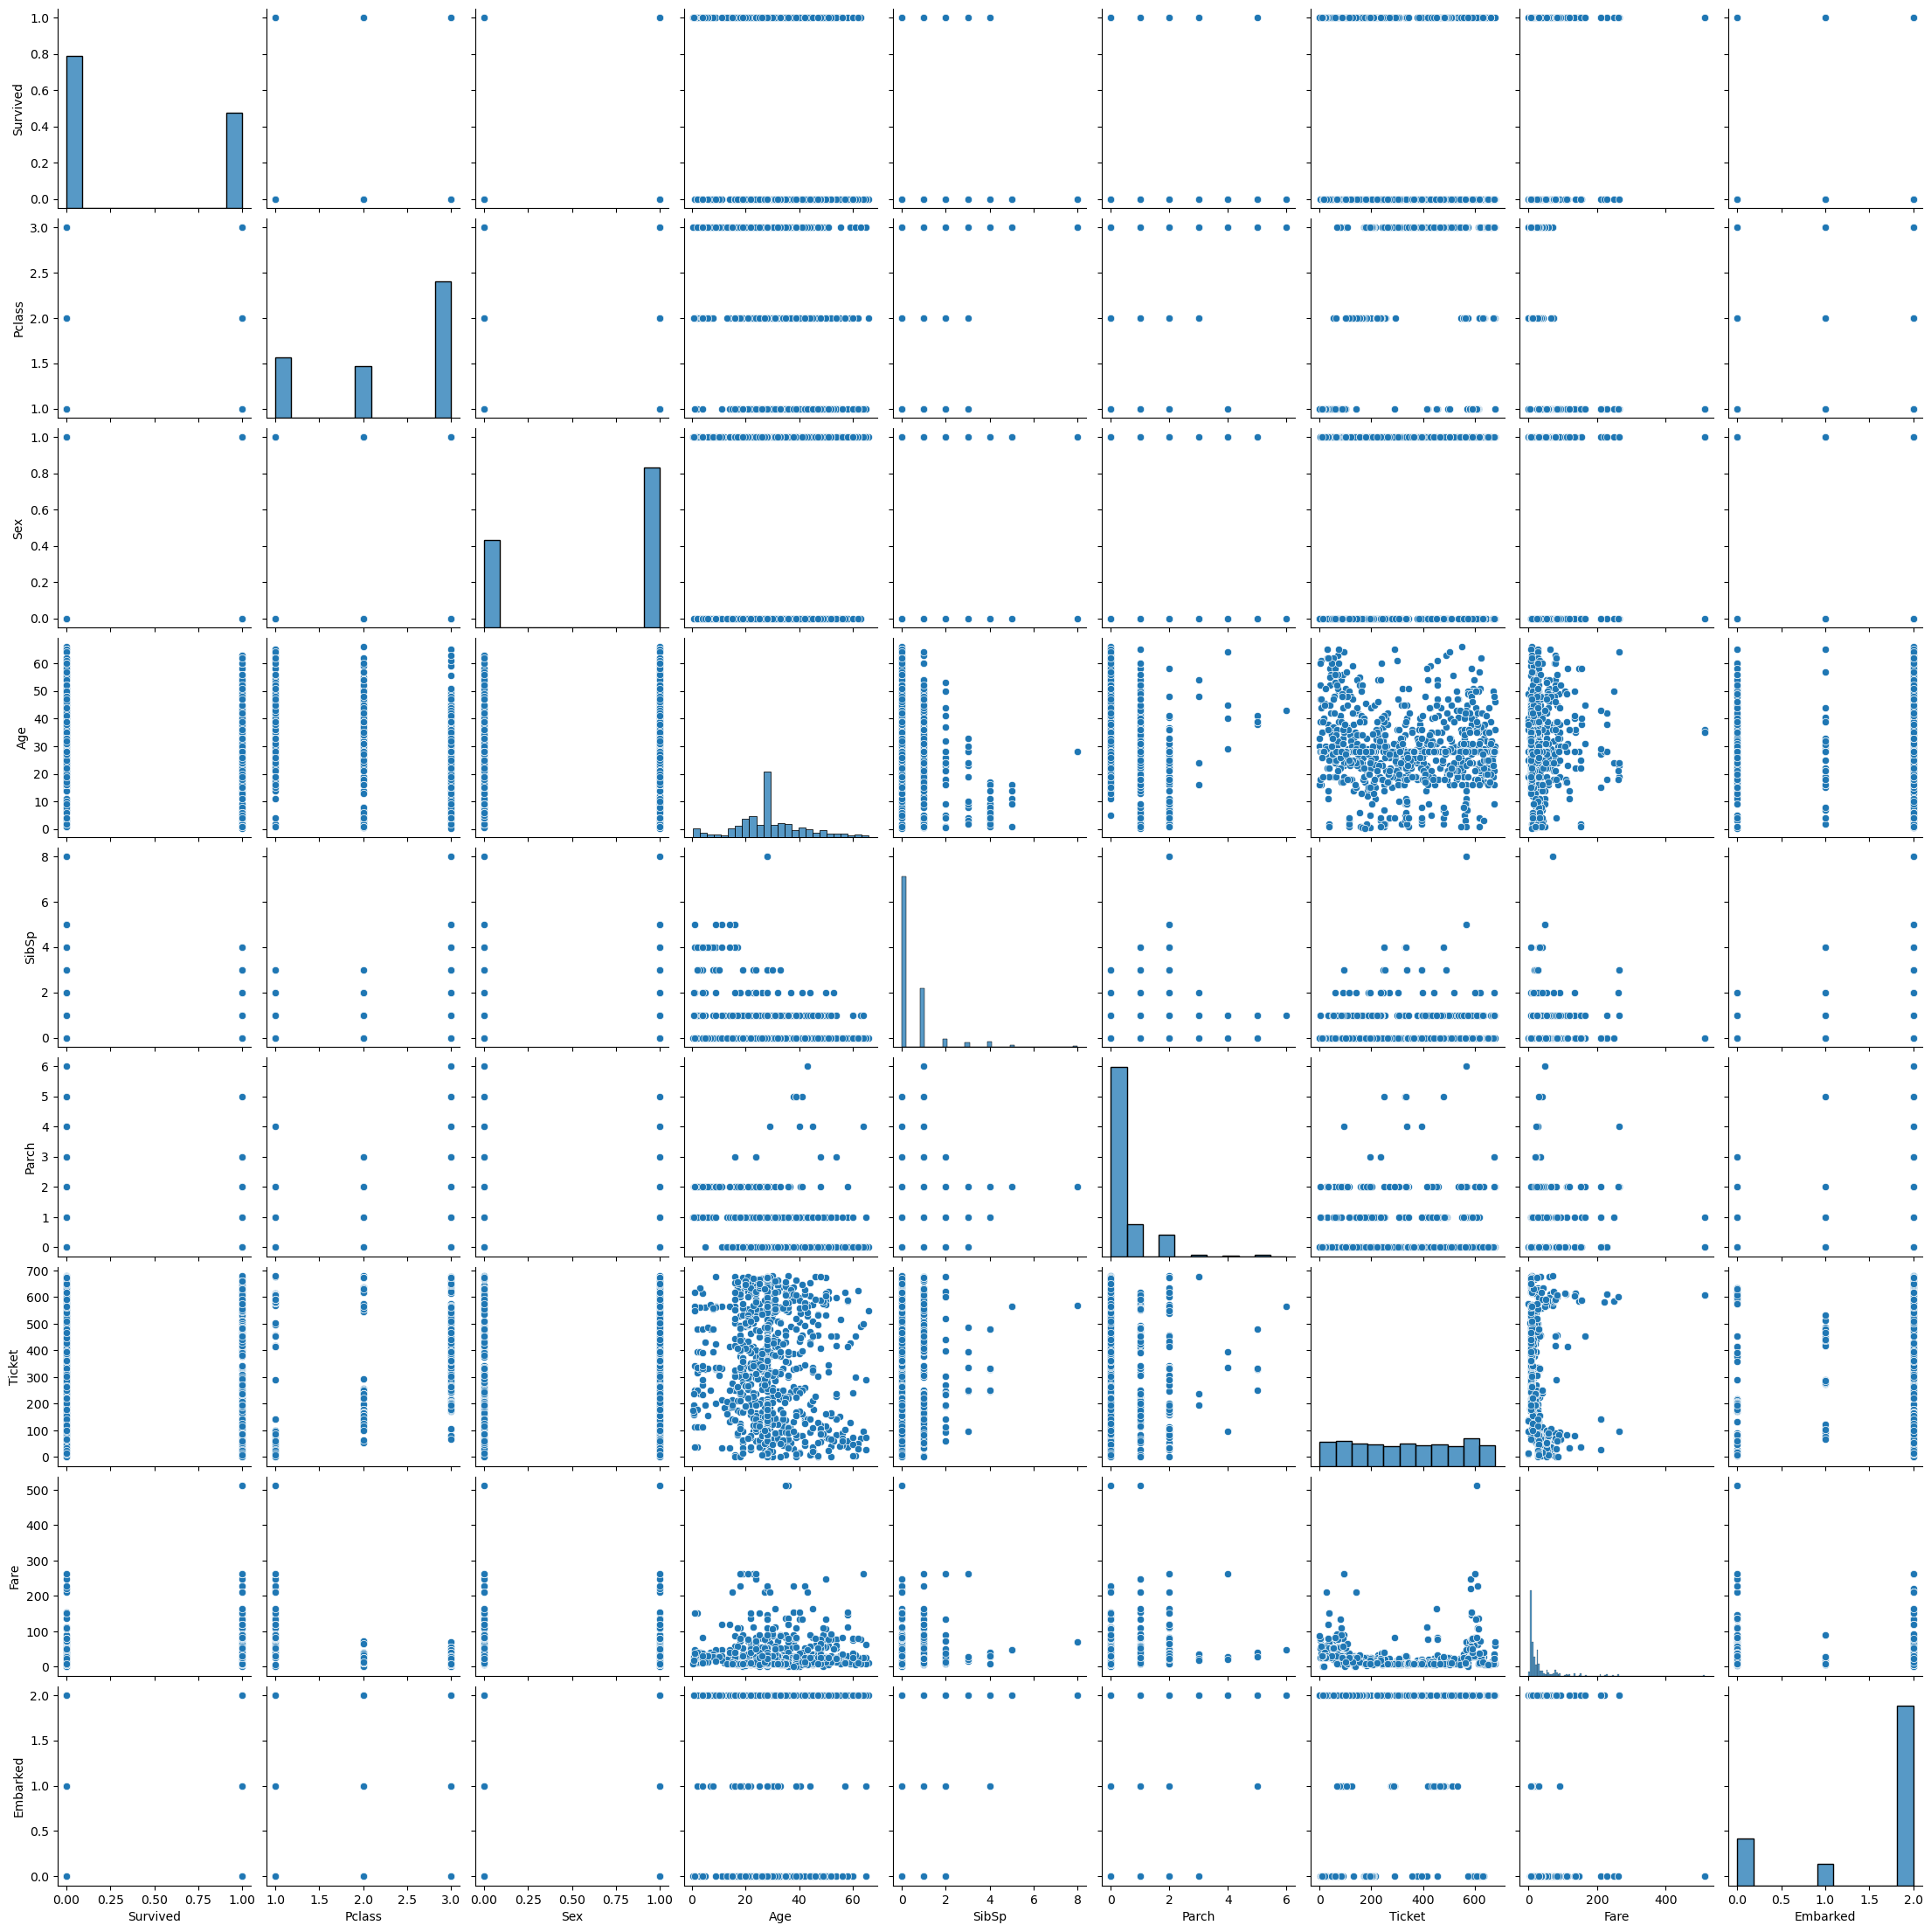

In [88]:
sns.pairplot(df1)

In [89]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_x = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Embarked']
x = df[x_x]
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

   VIF Factor  features
0    8.143890    Pclass
1    3.096674       Sex
2    4.646310       Age
3    1.579859     SibSp
4    1.573825     Parch
5    4.524575    Ticket
6    1.781499      Fare
7    4.653356  Embarked


## Note 4: Only Sibsp, Parch are dropped as they have worst co-relation with survived

In [91]:
columns_to_drop=['SibSp', 'Parch'] # Least co-relation with output
df2 = df.drop(columns_to_drop, axis=1)
df2

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
0,0,3,1.0,22.0,523.0,7.2500,2.0
1,1,1,0.0,38.0,596.0,71.2833,0.0
2,1,3,0.0,26.0,669.0,7.9250,2.0
3,1,1,0.0,35.0,49.0,53.1000,2.0
4,0,3,1.0,35.0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,101.0,13.0000,2.0
887,1,1,0.0,19.0,14.0,30.0000,2.0
888,0,3,0.0,28.0,675.0,23.4500,2.0
889,1,1,1.0,26.0,8.0,30.0000,0.0


# MODEL

## 1. Feature Scaling using Standard Scalarization

In [92]:
y=df["Survived"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.834989,0.735182,-0.566559,0.554101,-0.464661,0.921557,-0.495460,0.586522
1,-1.552644,-1.360207,0.655523,0.554101,-0.464661,1.285524,0.786013,-1.941588
2,0.834989,-1.360207,-0.261038,-0.502192,-0.464661,1.649492,-0.481951,0.586522
3,-1.552644,-1.360207,0.426382,0.554101,-0.464661,-1.441738,0.422118,0.586522
4,0.834989,0.735182,0.426382,-0.502192,-0.464661,0.667278,-0.479450,0.586522
...,...,...,...,...,...,...,...,...
870,-0.358827,0.735182,-0.184658,-0.502192,-0.464661,-1.182474,-0.380388,0.586522
871,-1.552644,-1.360207,-0.795699,-0.502192,-0.464661,-1.616243,-0.040173,0.586522
872,0.834989,-1.360207,-0.108278,0.554101,2.029685,1.679407,-0.171256,0.586522
873,-1.552644,0.735182,-0.261038,-0.502192,-0.464661,-1.646158,-0.040173,-1.941588


## 2. OverSampling

In [93]:
y.value_counts()

Survived
0    539
1    336
Name: count, dtype: int64

In [94]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [95]:
y1.value_counts()

Survived
0    539
1    539
Name: count, dtype: int64

## 3. Best random state value:

In [96]:
y1.unique() # Will apply classification model

array([0, 1], dtype=int64)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i
print("Best accuracy is", maxAccu," at random state ", maxRS)

Best accuracy is 0.8858024691358025  at random state  148


## 4. Creating train test split

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

## 5. Classification Algorithms and Cross Validation Score

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

Accuracy Score of:   RandomForestClassifier()  is 
0.8765432098765432
[[139  18]
 [ 22 145]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       157
           1       0.89      0.87      0.88       167

    accuracy                           0.88       324
   macro avg       0.88      0.88      0.88       324
weighted avg       0.88      0.88      0.88       324



Cross Validation of:   RandomForestClassifier()  is 
[0.77777778 0.81944444 0.81481481 0.89302326 0.88837209]
0.8386864771748493
Diff in Acc Score and Cross Val Score is -  0.037856732701693874


Accuracy Score of:   ExtraTreesClassifier()  is 
0.8611111111111112
[[137  20]
 [ 25 142]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       157
           1       0.88      0.85      0.86       167

    accuracy                           0.86       324
   macro avg       0.86      0.86      0.86       324
weighted avg       


### Best Model is : BaggingClassifier() - .84


# 6. Hyper Parameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]}
GCV = GridSearchCV(BaggingClassifier(),parameters,cv=7)
GCV.fit(x_train,y_train)
GCV.best_params_


{'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 50}

In [104]:
bc_bp=BaggingClassifier(max_features= 1.0, max_samples= 0.5, n_estimators= 50)
bc_bp.fit(x_train,y_train)
pred=bc_bp.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.65432098765432


In [ ]:
7. Saving the Model